## Linear Regression Model

### 0. Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
#For linear Regression using the statsmodels package
import statsmodels.api as stm

In [3]:
#For linear Regression using the sklearn package
import scipy.stats as stats
import sklearn

### 1. Reading the Data

In [4]:
#Setting the working directory
#os.chdir("C:\\Users\\hp\\Desktop\\Python\\Machine Learning")

In [8]:
cars = pd.read_csv('ML - Cars.csv')     
cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
5,Ford Galaxie 500,15.0,8,429.0,198,4341,10.0,70,US
6,Chevrolet Impala,14.0,8,454.0,220,4354,9.0,70,US
7,Plymouth Fury iii,14.0,8,440.0,215,4312,8.5,70,US
8,Pontiac Catalina,14.0,8,455.0,225,4425,10.0,70,US
9,AMC Ambassador DPL,15.0,8,390.0,190,3850,8.5,70,US


In [ ]:
#Printing a part of the data
cars.sample(10)

### 2. Objective

To predict the MPG (Miles per gallon) of cars based on the Weight (in pounds) of the cars

**Target (Response) Variable** - MPG

**Explanatory Variable (Predictors)** - Weight

### 3. Understanding the variable

#### Variable: MPG

In [ ]:
#Histogram of the variable MPG
cars.MPG.hist(grid=False, color="orange", edgecolor="black", bins=10)
plt.xlabel("Miles Per Gallon")
plt.ylabel("No. of cars")
plt.title("Histogram of Cars")
plt.show()

In [ ]:
#Boxplot of the variable MPG
cars.boxplot(column="MPG", notch=True, vert=False)
plt.xlabel("MPG of cars")
plt.show()

In [ ]:
cars[['MPG']].describe().transpose()

**Observations and Notes**



1. Anomalies?
2. Shape?
3. Outliers?
4. etc.?

#### Variable: Weight

In [ ]:
#Histogram of the variable Weight
cars.hist(column="Weight", grid=False, color = "maroon", edgecolor="black")
plt.xlabel("Weight (in pounds) of Cars")
plt.ylabel("No. of Cars")
plt.title("Histogram of Weights of Cars")
plt.show()

In [ ]:
#Boxplot of Weights of Cars
cars.boxplot(column='Weight', vert=False)
plt.xlabel('Weights (in pounds) of Cars')
plt.title('Boxplot of Weights of Cars')
plt.show()

In [ ]:
cars[['Weight']].describe().transpose()

**Observations and Notes**


1. Anomalies?
2. Shape?
3. Outliers?
4. etc.?

### 4. Studying the Association between the Target and the Explanatory Variable

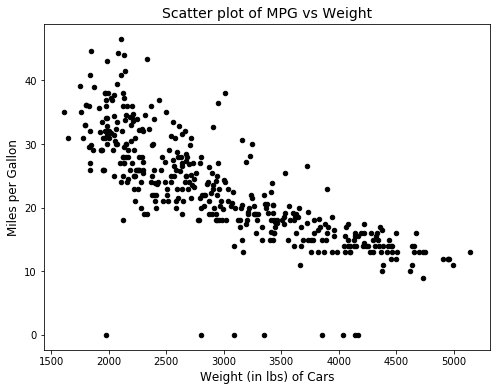

In [6]:
#Plotting the scatter plot to study the association between MPG and Weight
cars.plot(kind='scatter', x='Weight', y='MPG', color='black', figsize=(8,6))
plt.ylabel('Miles per Gallon', fontsize=12)
plt.xlabel('Weight (in lbs) of Cars', fontsize=12)
plt.title('Scatter plot of MPG vs Weight',fontsize=14)
plt.show()


### 5. Removing the anomalies

In [7]:
#Let us remove the observations for which MPG is 0
cars2 = cars.loc[cars.MPG != 0, ]

In [ ]:
cars2[['MPG','Weight']].describe().transpose()

### 6. Train-Test Split for Model Fitting and Validation

In [9]:
#Randomly divide the data into train (70%) and test (30%)

#Step 1 - Select 0.7*398 random numbers between 1 and 406 (with some of the numbers removed in between)
np.random.seed(0)
train = np.random.choice(cars2.index, round(0.7*398), replace=False)
train.sort()
#train

In [10]:
train

array([  1,   2,   3,   4,   5,   6,   7,   8,  15,  16,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  30,  32,  33,  35,  36,
        40,  41,  42,  44,  47,  51,  52,  53,  56,  58,  59,  61,  62,
        63,  66,  67,  68,  70,  71,  72,  73,  74,  75,  78,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  90,  92,  93,  96,  97,  99,
       100, 103, 104, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 123, 125, 127, 129, 131, 132, 133, 136, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153,
       156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       171, 173, 174, 175, 177, 178, 180, 182, 183, 186, 188, 189, 191,
       193, 195, 196, 197, 198, 201, 203, 205, 206, 207, 211, 212, 213,
       215, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230,
       231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 252, 253, 254, 255, 256, 257, 259, 26

In [11]:
#Step 2 - Select the observations from the data corresponding to the train indices
X_train = cars2.loc[train, ['Weight']]
y_train = cars2.loc[train, 'MPG']


In [12]:
#Step 3 - Get the indices for the test data

test = []
for i in list(cars2.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()
#test

In [13]:
#Step 4 - Slice the test data
X_test = cars2.loc[test, ['Weight']]
y_test = cars2.loc[test, 'MPG']


In [ ]:
#Some checks...
print(len(y_train), len(X_train))
print(len(y_test), len(X_test))


In [ ]:
279+119

### 7. Fitting a Simple Linear Regression Model (Using the statsmodel package)

In [14]:
#This step is done to add get the constant term for the model
X_train = stm.add_constant(X_train)  #This will help us to get the value of a in Y = a + bX
X_train.head()

,const,Weight
1,1.0,3693
2,1.0,3436
3,1.0,3433
4,1.0,3449
5,1.0,4341


In [15]:
#Ordinary Least Squared (OLS) Regression
model = stm.OLS(y_train,X_train).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     572.4
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.32e-69
Time:                        16:43:46   Log-Likelihood:                -816.49
No. Observations:                 279   AIC:                             1637.
Df Residuals:                     277   BIC:                             1644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5396      0.994     46.804      0.000      44.582      48.497
Weight        -0.0078      0.000    -23.925      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       28.188   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.702
Skew:                           0.684   Prob(JB):                     3.94e-09
Kurtosis:                       4.207   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared = 0.674
a = 46.5396
b = -0.00775

In [ ]:
model.params

Y = a + b * X
MPG = a + b * Weight

MPG = 46.5396 - 0.007751 * Weight   --> Linear Regression Equation to Predict MPG on Weight
R^2 = 0.674

Y = a + b * X

b = slope of the line. If X increases by 1 unit then Y increases by b units.
a = intercept of the line. It is the value of Y for which the value of X is 0.

MPG = 46.5396 + -0.007751 * Weight

slope = -0.007751   => With 1,000 lb increase in weight the MPG of the car decreases by 0.007751 times.
intercept = 46.5396 => The MPG of the car is 46.5396 on average when the weight of the car is 0 lbs (No meaning)

R^2 = 0.674 => R^2 is a measure of the goodness of fit of the model. It measured how well the model fits the data.

Interpretation:
R squared: The proportion of variation in the targer explained by the predictor

In our case:
67.4% of **variation** of the variable MPG is explained by the predictor Weight using this regression model.

The value of R squared ranges between 0 to 1 (or 0% to 100%). Higher the value of R square better is the model fit.

In [ ]:
Weight = np.sort(X_train.Weight)
model.params[0] + model.params[1]*Weight #Predicted values of MPG foe a value of Weight

In [ ]:
#Ploting the linear regression line

#Scatter Plot 
cars2.plot(kind='scatter', x='Weight', y='MPG', color='black', figsize=(8,6))
plt.ylabel('Miles per Gallon', fontsize=12)
plt.xlabel('Weight (in lbs) of Cars', fontsize=12)
plt.title('Scatter plot of MPG vs Weight',fontsize=14)


#Sorted values of Weight
Weight = np.sort(X_train.Weight)

#Plotting the sorted values of weight with its fitted value
plt.plot(Weight, model.params[0] + model.params[1]*Weight)


plt.show()




In [ ]:
model.params

### 8. Making Prediction using the Model (on the test data)

In [17]:
X_test = stm.add_constant(X_test)
X_test.head()

,const,Weight
0,1.0,3504
9,1.0,3850
29,1.0,2234
31,1.0,4615
34,1.0,4732


In [18]:
#Prediction
#Model: MPG = 46.5396 - 0.007751 * Weight
model.predict(X_test)[:10]

#[46.53   -0.0077]*X_test

0     19.379685
9     16.697797
29    29.223607
31    10.768191
34     9.861310
37    29.270114
38    30.680817
43    20.945411
45    13.915145
46    11.938610
dtype: float64

In [19]:
#Storing the predicted values in an array
pred = model.predict(X_test)
pred[:10]

0     19.379685
9     16.697797
29    29.223607
31    10.768191
34     9.861310
37    29.270114
38    30.680817
43    20.945411
45    13.915145
46    11.938610
dtype: float64

In [ ]:
y_test[:10]

### 9. Checking Accuracy

In [20]:
#Error = actual - predicted
e = y_test - pred
np.mean(e)

-0.003071992307418098

In [21]:
#Error^2
e**2

#RMSE = sqrt(sum(e**2)/(ntest-1))
math.sqrt(sum(e**2)/(len(y_test)-2))

3.9083793892163223

In [ ]:
#RSS = sum of squared error; Note: RMSE = sqrt(RSS/(ntest-2))
rss = np.sum(e**2)
rss

A Model must have larger value of R square and smaller value of RMSE.

In [22]:
#Percentage error
(3.8917/np.mean(cars2.MPG))*100

16.550162413984694

Our prediction error are off by an average amount of 16.55%. If that is ok for you you may proceed.

### 10. Diagnostic Plots

Calculations required for some of the plots

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [ ]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

In [ ]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)



plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y_train,
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})




plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


In [ ]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [ ]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

In [ ]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
p = len(model.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

### 11. Improving the Model

In [ ]:
#Taking log transformation of the variables
cars2['log_Weight'] = np.log(cars2.Weight)
cars2['log_MPG'] = np.log(cars2.MPG)

In [ ]:
cars2.head()

In [ ]:
cars2.plot(kind='scatter', x='log_Weight', y='log_MPG')
plt.show()

In [ ]:
#Creating the train and test data

#Training Data
X_train = cars2.loc[train, ['log_Weight']]
y_train = cars2.loc[train, 'log_MPG']

#Test Data
X_test = cars2.loc[test, ['log_Weight']]
y_test = cars2.loc[test, 'log_MPG']

#Adding a column for constant
X_train = stm.add_constant(X_train)

In [ ]:
X_train.head()

In [ ]:
model = stm.OLS(y_train,X_train).fit()
model.summary()

**Model 2:**

log(MPG) = 11.5449 - 1.0612 * log(Weight)

**Interpretation**

With one unit increase in log(Weight) the log(MPG) decreases by 1.0612 units.

In [ ]:
y_test[:10]

In [ ]:
#Making Predicting on test data
X_test = stm.add_constant(X_test)
pred = model.predict(X_test)
pred[:10]

In [ ]:
#RMSE
math.sqrt(sum((y_test - pred)**2)/(len(y_test)-1))

In [ ]:
0.1531/np.mean(y_test)

In [ ]:
np.mean(y_test)

In [ ]:
#RSS
np.sum((np.exp(pred) - np.exp(y_test))**2)

In [ ]:
#RMSE
math.sqrt(np.sum((np.exp(pred) - np.exp(y_test))**2)/(len(y_test)-1))

In [ ]:
#Check the diagnostic plot


### Multiple Linear Regression Model

In [ ]:
#Pairwise Scatter plot

from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars2[["MPG", "Weight", "Horsepower"]], alpha=0.75, figsize=(10, 8), diagonal='kde')
plt.show()

In [ ]:
#Let us remove the observations for which MPG is 0
cars2 = cars.loc[(cars.MPG != 0) & (cars.Horsepower !=0), ]

In [ ]:
cars2.isnull().sum()

In [ ]:
cars2[['MPG','Horsepower']].describe().transpose()

In [ ]:
#cars2.head()

In [ ]:
cars2.shape

In [ ]:
#Creating log transformed features
cars2['log_MPG'] = np.log(cars2.MPG)
cars2['log_Weight'] = np.log(cars2.Weight)
cars2['log_Horsepower'] = np.log(cars2.Horsepower)
cars2.head()

In [ ]:
#Pairwise Scatter plot

from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars2[["log_MPG", "log_Weight", "log_Horsepower"]], alpha=0.75, figsize=(10, 8), diagonal='hist')
plt.show()

In [ ]:
#Randomly divide the data into train (70%) and test (30%)

#Step 1 - Select 0.7*398 random numbers between 1 and 406 (with some of the numbers removed in between)
np.random.seed(0)
train = np.random.choice(cars2.index, round(0.7*392), replace=False)
train.sort()


#Step 3 - Get the indices for the test data
test = []
for i in list(cars2.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()
#test


In [ ]:
#Creating the train and test data

#Training Data
X_train = cars2.loc[train, ['log_Weight', 'log_Horsepower']]
y_train = cars2.loc[train, 'log_MPG']

#Test Data
X_test = cars2.loc[test, ['log_Weight', 'log_Horsepower']]
y_test = cars2.loc[test, 'log_MPG']

#Adding a column for constant
X_train = stm.add_constant(X_train)
X_train.head()

In [ ]:
#cars2.isnull().sum()

In [ ]:
#y_train.isnull().sum()

In [ ]:
model = stm.OLS(y_train,X_train).fit()
model.summary()

In [ ]:
#Making Predicting on test data
X_test = stm.add_constant(X_test)
pred = model.predict(X_test)

#RSS
np.sum((np.exp(pred) - np.exp(y_test))**2)

In [ ]:
math.sqrt(np.sum((np.exp(pred) - np.exp(y_test))**2)/len(test)-1)

In [ ]:
3.37714/np.mean(np.exp(y_test))*100

### Plotting Linear Regression Line using sklearn Package

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

In [ ]:
#Creating the train and test data

#Training Data
X_train = cars2.loc[train, ['Weight']]
y_train = cars2.loc[train, 'MPG']

#Test Data
X_test = cars2.loc[test, ['Weight']]
y_test = cars2.loc[test, 'MPG']


In [ ]:
#Fitting the linear regression model
lm.fit(X_train,y_train)

In [ ]:
#Printing the intercept
lm.intercept_

In [ ]:
#Printing the coefficient
lm.coef_

In [ ]:
#Making prediction on the test data
lm.predict(X_test)

In [ ]:
p = lm.predict(X_test)

In [ ]:
error = (p - y_test)

In [ ]:
math.sqrt(sum(error**2)/(len(test)-1))